In [185]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [12]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [ 210501, 210508 , 210515, 210522 , 210529 , 210605 , 210612 , 210619 , 210626 , 210703 , 210710 , 210717 , 210724 , 210731 , 210807, 210814 , 210821, 210828 ]
DF = get_data(week_nums)

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768021 entries, 0 to 209067
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [18]:
DF.columns = [column.strip() for column in DF.columns]

In [21]:
DF["DATE_TIME"] = pd.to_datetime(DF.DATE + " " + DF.TIME, format="%m/%d/%Y %H:%M:%S")
DF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


In [27]:
(DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
2511958,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 02:00:00,1
2511960,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 10:00:00,1
2511961,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 14:00:00,1
2511962,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 18:00:00,1
2511963,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 22:00:00,1
2511964,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 02:00:00,1
2511965,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 06:00:00,1
2511966,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 10:00:00,1
2511967,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 14:00:00,1


In [28]:
DF.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
DF.drop_duplicates( subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True )

In [29]:
(DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
2511958,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 02:00:00,1
2511960,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 10:00:00,1
2511961,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 14:00:00,1
2511962,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 18:00:00,1
2511963,R138,R293,00-03-04,34 ST-PENN STA,2021-05-02 22:00:00,1
2511964,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 02:00:00,1
2511965,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 06:00:00,1
2511966,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 10:00:00,1
2511967,R138,R293,00-03-04,34 ST-PENN STA,2021-05-03 14:00:00,1


In [30]:
DF = DF.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [44]:
Daily = (DF.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [46]:
Daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,7561578
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968
6,A002,R051,02-00-00,59 ST,04/30/2021,7564517
7,A002,R051,02-00-00,59 ST,05/01/2021,7564974
8,A002,R051,02-00-00,59 ST,05/02/2021,7565300
9,A002,R051,02-00-00,59 ST,05/03/2021,7565798


In [49]:
Daily[["PREV_DATE", "PREV_ENTRIES"]] = (Daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-49-03551c1a871b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Daily[["PREV_DATE", "PREV_ENTRIES"]] = (Daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [50]:
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,7561578,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0


In [53]:
Daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968,04/28/2021,7563448.0


In [54]:
Daily[Daily["ENTRIES"] < Daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
4915,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609447,04/24/2021,885609604.0
4916,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609261,04/25/2021,885609447.0
4917,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609037,04/26/2021,885609261.0
4918,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608798,04/27/2021,885609037.0
4919,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608538,04/28/2021,885608798.0


In [78]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = Daily.apply(get_daily_counts, axis=1, max_counter=100000)

59 154688.0
3082 1390173.0
29 479839.0
18 4340953.0
14 1028362.0
93 765803.0
5 150038.0
327680 756269765.0
385 327866.0
25 262152.0
353 8049630.0
0 5309746.0
458752 24.0
101 2651127.0
458754 262214.0
8 458758.0
167790157 702266.0
48 8724126.0
65 106396.0
458754 262144.0
901 659349.0
393216 728.0
327680 4.0
1 327690.0
24 2627860.0
153 1604971.0
5946 4298704.0
0 117440512.0
83 366981.0
135 8882903.0
340 157816.0
113 4454729.0
158 7643335.0
331 500527.0
327975 7577027.0
217 4780275.0
85 490316.0
4 1534984197.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
87 755027.0
12517611 82.0
36 1198448.0
103 305512.0
46 5405351.0
687970551 19471253.0
200 705357551.0
1076 7489966.0
16777220 1037157.0
463 6101664.0
162 1110928.0
6 16034831.0
327 2524852.0
34 692662.0
374 152140.0
262150 2393328.0
458814 271001.0
327682 786526.0
327680 0.0
67436550 375578.0
143 4070964.0
5 58304715.0
932 628772.0
386 6213955.0
442 656520.0
37 1950780.0
1048584 181919.0
443 15689395.0
10 558268.0
528 234172

In [72]:
Daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,04/24/2021,7561578.0,265.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,04/25/2021,7561843.0,457.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,04/26/2021,7562300.0,573.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,04/27/2021,7562873.0,575.0
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968,04/28/2021,7563448.0,520.0


In [93]:
station_daily = Daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,04/25/2021,4578.0
1,1 AV,04/26/2021,6686.0
2,1 AV,04/27/2021,6895.0
3,1 AV,04/28/2021,7118.0
4,1 AV,04/29/2021,7144.0


In [100]:
station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

station_totals.head(3)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,6240904.0
1,FULTON ST,4830139.0
2,34 ST-HERALD SQ,4715722.0


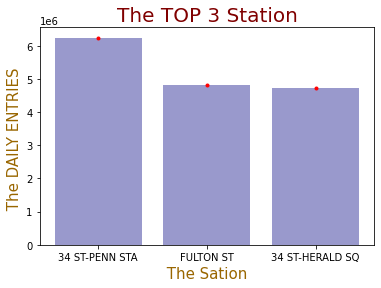

In [180]:
x=station_totals.head(3)
plt.bar(x["STATION"],x["DAILY_ENTRIES"],color='#9999CC');
plt.ylabel(" The DAILY ENTRIES  ", fontsize = 15 ,color='#996600' )
plt.xlabel(" The Sation ", fontsize = 15 ,color='#996600' )
plt.title("The TOP 3 Station", fontsize = 20,color='maroon')
plt.errorbar(x["STATION"],x["DAILY_ENTRIES"], fmt='r.' );

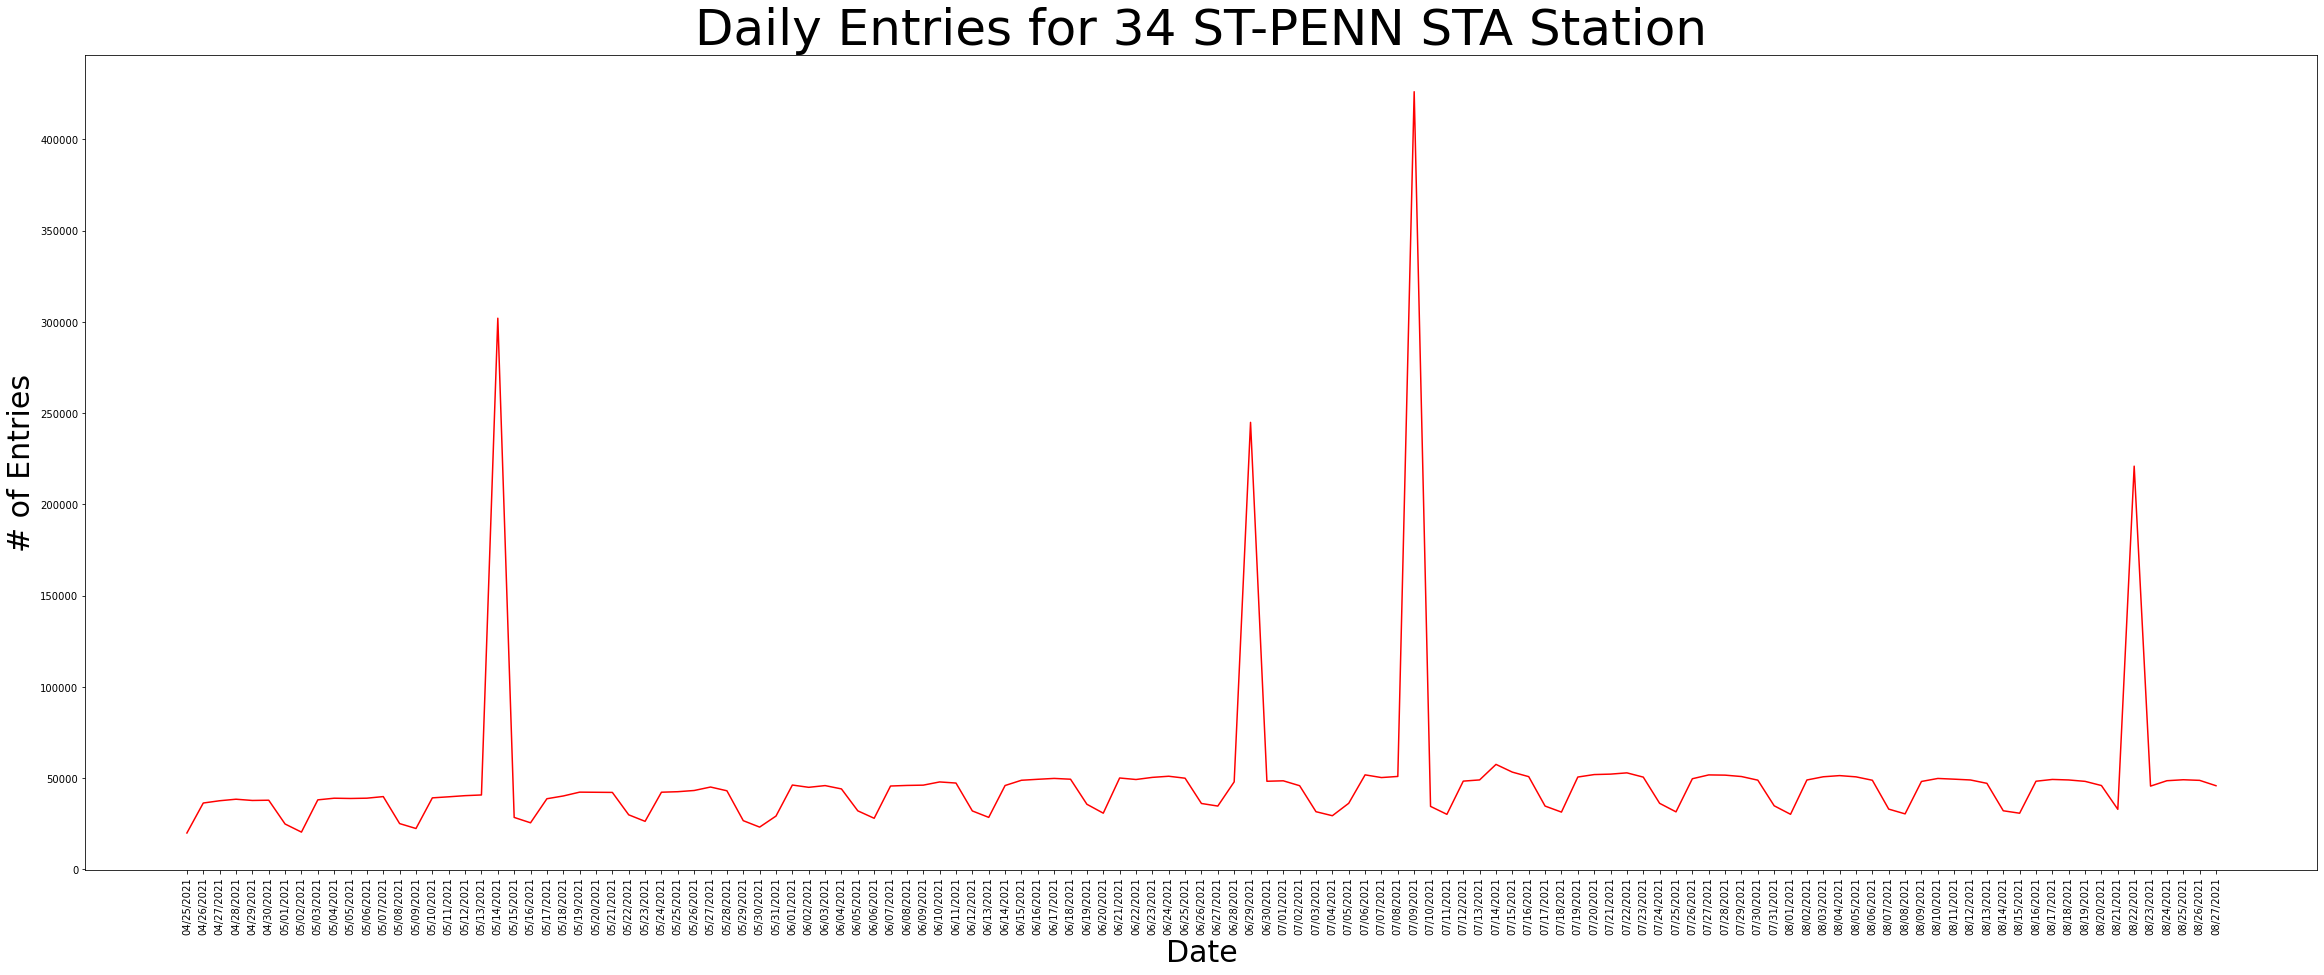

In [192]:
station_daily_34S_TA = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
plt.figure(figsize=(40,15))
plt.plot(station_daily_34S_TA['DATE'], station_daily_34S_TA['DAILY_ENTRIES'], c = "r")
plt.ylabel('# of Entries',fontsize = 30)
plt.xlabel('Date',fontsize = 30)
plt.xticks(rotation=90)
plt.title('Daily Entries for 34 ST-PENN STA Station', fontsize = 50);


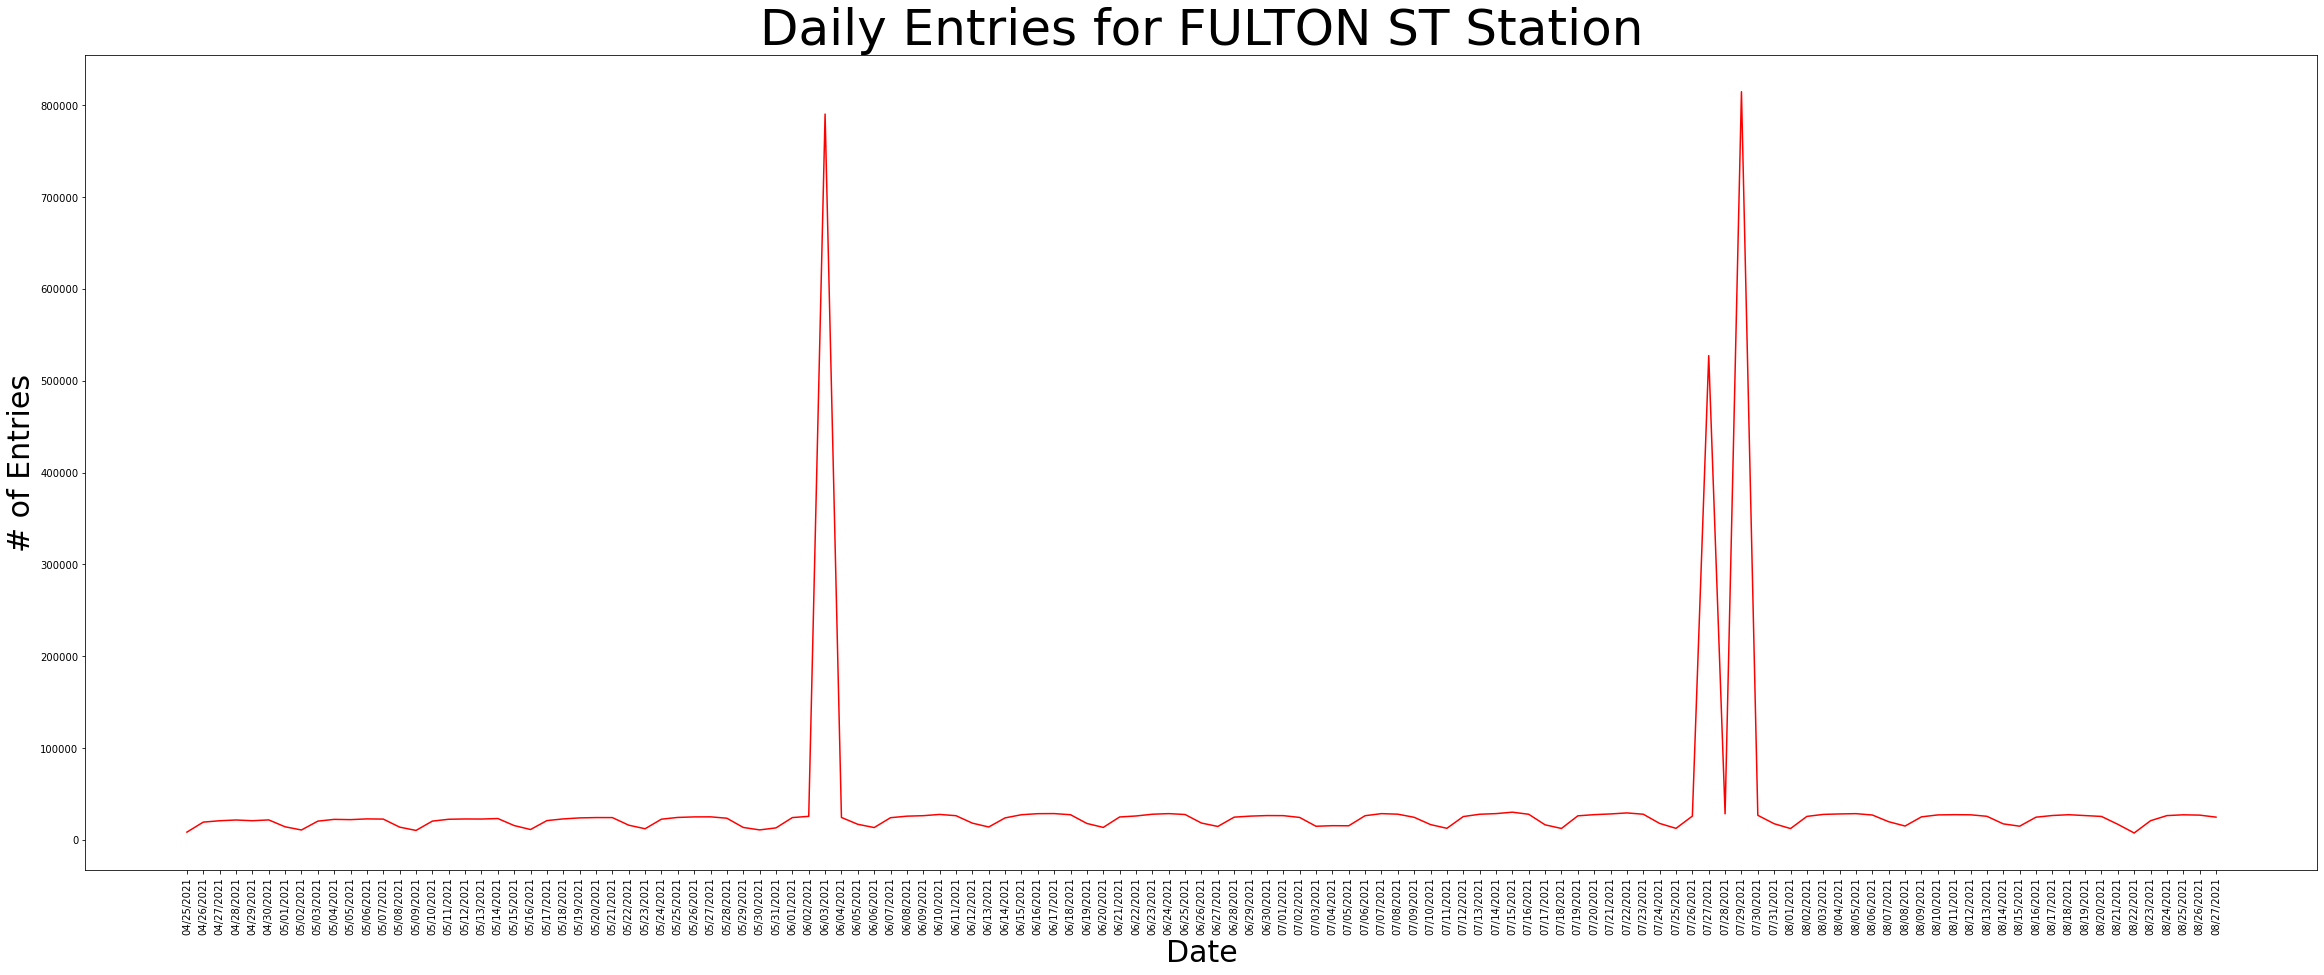

In [195]:
station_daily_FULTON_ST = station_daily[station_daily['STATION'] == 'FULTON ST']
plt.figure(figsize=(40,15))
plt.plot(station_daily_FULTON_ST['DATE'], station_daily_FULTON_ST['DAILY_ENTRIES'], c="r")
plt.ylabel('# of Entries',fontsize = 30)
plt.xlabel('Date',fontsize = 30 )
plt.xticks(rotation=90)
plt.title('Daily Entries for FULTON ST Station', fontsize = 50);




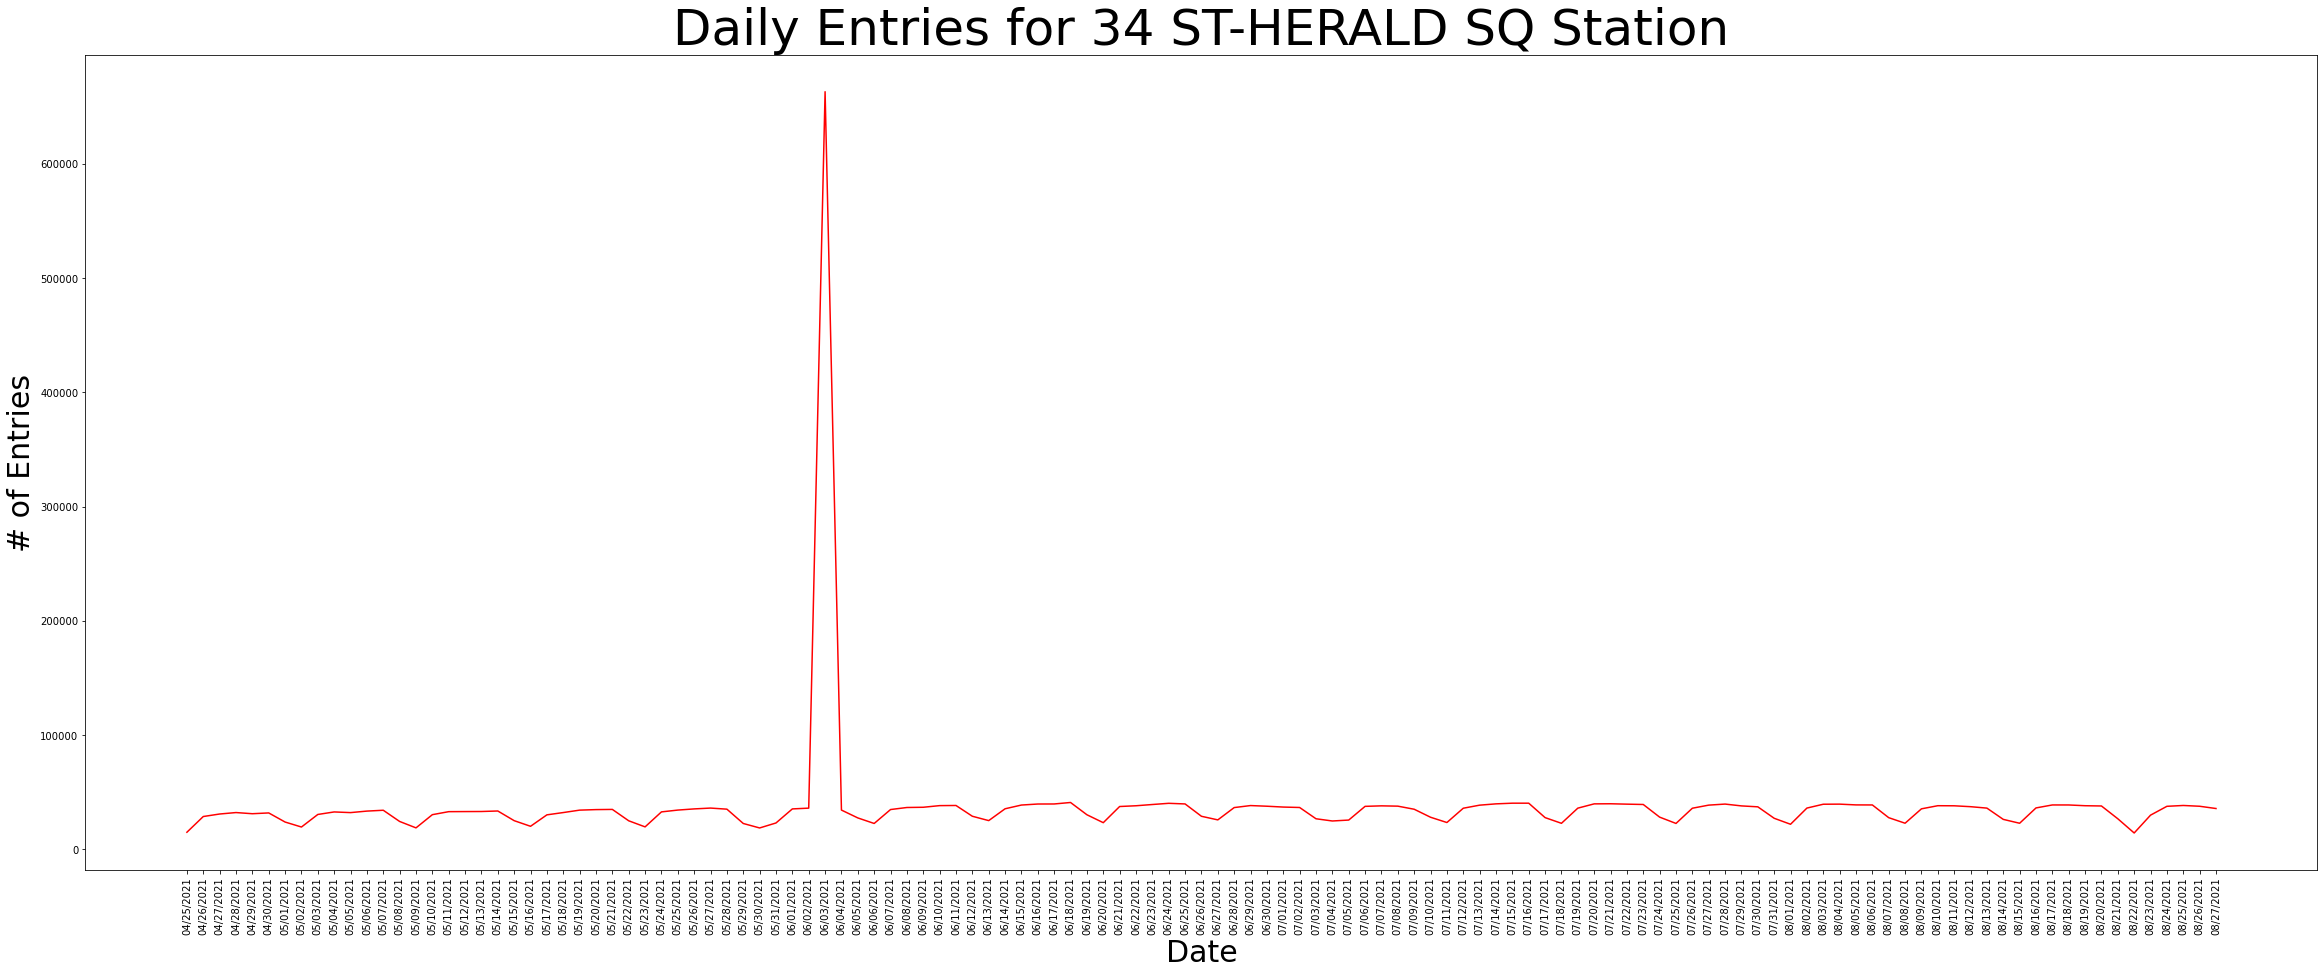

In [196]:
station_daily_34_SQ = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ']
plt.figure(figsize=(40,15))
plt.plot(station_daily_34_SQ['DATE'], station_daily_34_SQ['DAILY_ENTRIES'], c="r")
plt.ylabel('# of Entries',fontsize = 30)
plt.xlabel('Date',fontsize = 30 )
plt.xticks(rotation=90)
plt.title('Daily Entries for 34 ST-HERALD SQ Station', fontsize = 50);


In [188]:
Daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624187 entries, 1 to 629218
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   C/A            624187 non-null  object 
 1   UNIT           624187 non-null  object 
 2   SCP            624187 non-null  object 
 3   STATION        624187 non-null  object 
 4   DATE           624187 non-null  object 
 5   ENTRIES        624187 non-null  int64  
 6   PREV_DATE      624187 non-null  object 
 7   PREV_ENTRIES   624187 non-null  float64
 8   DAILY_ENTRIES  624187 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 47.6+ MB
